In [140]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values & Tune different Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For pandas profiling
from pandas_profiling import ProfileReport


In [141]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

In [142]:
df.shape

(4888, 20)

In [143]:
dic = pd.read_excel("Tourism.xlsx")

In [144]:
dic.shape

(21, 4)

In [145]:
dic.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Tourism,CustomerID,Unique customer ID
2,NaN,Tourism,ProdTaken,Whether the customer has purchased a package o...
3,NaN,Tourism,Age,Age of customer
4,NaN,Tourism,TypeofContact,How customer was contacted (Company Invited or...


In [146]:
dic = dic.drop(['Unnamed: 0','Unnamed: 1'], axis=1)
dic = dic.drop(0, axis=0)
dic.columns = ['Variable','Description']

In [147]:
dic.sample()

,Variable,Description
19,Designation,Designation of the customer in the current org...


In [148]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [150]:
df = df.drop(columns='CustomerID')

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


In [152]:

# Generating a data frame of missing values by count and %
missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['%'])
missing['count'] = df.isnull().sum()


In [153]:
print('Missing Values in the data frame')
missing.head()

Missing Values in the data frame


,%,count
DurationOfPitch,5.135025,251
MonthlyIncome,4.766776,233
Age,4.623568,226
NumberOfTrips,2.864157,140
NumberOfChildrenVisiting,1.350245,66


In [154]:
print('The count of unique values in the data frame')
df.nunique().sort_values(ascending=False)

The count of unique values in the data frame


MonthlyIncome               2475
Age                           44
DurationOfPitch               34
NumberOfTrips                 12
NumberOfFollowups              6
Designation                    5
PitchSatisfactionScore         5
ProductPitched                 5
NumberOfPersonVisiting         5
MaritalStatus                  4
Occupation                     4
NumberOfChildrenVisiting       4
Gender                         3
PreferredPropertyStar          3
CityTier                       3
Passport                       2
OwnCar                         2
TypeofContact                  2
ProdTaken                      2
dtype: int64

In [155]:
dic.head(21)

,Variable,Description
1,CustomerID,Unique customer ID
2,ProdTaken,Whether the customer has purchased a package o...
3,Age,Age of customer
4,TypeofContact,How customer was contacted (Company Invited or...
5,CityTier,City tier depends on the development of a city...
6,DurationOfPitch,Duration of the pitch by a salesperson to the ...
7,Occupation,Occupation of customer
8,Gender,Gender of customer
9,NumberOfPersonVisiting,Total number of persons planning to take the t...
10,NumberOfFollowups,Total number of follow-ups has been done by sa...


In [156]:
# Printing a list of unique values, values shown in text file. Some categories have a large number of values so dropping those
vc = df.columns.drop(['MonthlyIncome','Age','DurationOfPitch','NumberOfTrips'])
for i in vc:
    print(i,'Has the following Unique Values')
    print(df[i].value_counts().sort_values(ascending=False))
    print('-'*50)

ProdTaken Has the following Unique Values
0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
TypeofContact Has the following Unique Values
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
CityTier Has the following Unique Values
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Occupation Has the following Unique Values
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Gender Has the following Unique Values
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
NumberOfPersonVisiting Has the following Unique Values
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int

### Data Intial observations
 * CustomerID is redundant with the index
 <br/><br/>
 * The following columns have missing values we will need to fix
    - DurationOfPitch - replace with mean
    - MonthlyIncome - replace with mean
    - Age - replace with mean
    - NumberOfTrips - replace with mode
    - NumberOfChildernVisting - replace with mode
    <br/><br/>
 * The following categorical columns can be dummies
    - TypeofContact
    - Occupation
    - Gender
    - ProductPitched
    - MartialStatus
    - Designation
    <br/><br/>
 * Customer Obeseravation:
    - 50% of customers are between 31 & 44
    - Most pitches are between 9 & 20 minutes, with the average being 15 min
    - 75% of trips have 1 - 3 people, only 25% of trips have 1 person
    - 25% of customers buy on the 1st Follow up, Most customers need 3-4 follow ups
    - No customers will book a property with less than 3 stars
    - 75% of customers take 1 - 4 trips per year
    - 75% of customers do not have passports making most trips local
    - Pitch Satification Score will be interesting during BiVariate Analysis
    - 50% of customers make between 20,300 - 25,600 per month
    <br/><br/>
 * Possible Outliers:
    - DurationOfPitch - max of 127
    - NumberOfTrips - 22 on the High End
    - MonthlyIncome - 98,678 might not be an outlier just a high income
    <br/><br/>
 * General Objservations:
    - roughly 29% of customers were invited the rest self inquired.
    - With that many customers self selecting advertising to select audiences might be a much stronger strategy instead of targeted reach outs.
    - The fast majority of visits are too tier 1 cities just under 2/3rd, with roughly 1/3rd traveling to tier 3 cities. There are almost no trips to tier 2 cities. The company should depri advertising to tier 2 cities
    - Married customers make up almost as much of the population the buys a package as all other categories. Advertising should prioritize married customers
    - The vast majority of packages are purchased by Executives and Managers. Advertising should prioritize these customers
    - The Gender Column has a typo creating an additional "Fe Male" value. 

In [157]:
# Fixing the gender columns
df['Gender'] = df['Gender'].replace(['Fe Male'],'Female')
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [215]:
# Replace missing values
df['DurationOfPitch'].fillna(int(df['DurationOfPitch'].mean()), inplace=True)
df['MonthlyIncome'].fillna(int(df['MonthlyIncome'].mean()), inplace=True)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['NumberOfTrips'].fillna(int(df['NumberOfTrips'].mode()), inplace=True)
df['NumberOfChildrenVisiting'].fillna(int(df['NumberOfChildrenVisiting'].mode()), inplace=True)

# Drop all rows with missing values left in the data set
df.dropna(inplace=True)

# Checking to make sure all null values have been treated
df.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

## EDA

### Reusable Functions
Reusing functions provided in the class  
Function for both Univariate and Bivariate Analysis

In [158]:
# reusing provided function for generating graphs

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [159]:
# reusing provided function for generating graphs
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [160]:
# reusing provided function for generating graphs

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

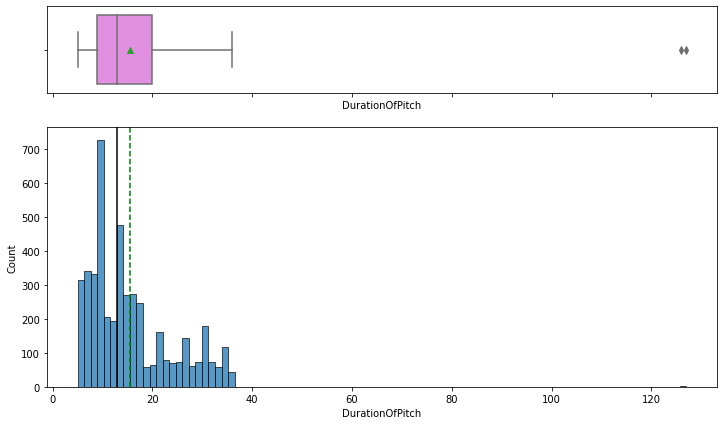

In [161]:
histogram_boxplot(df, 'DurationOfPitch')

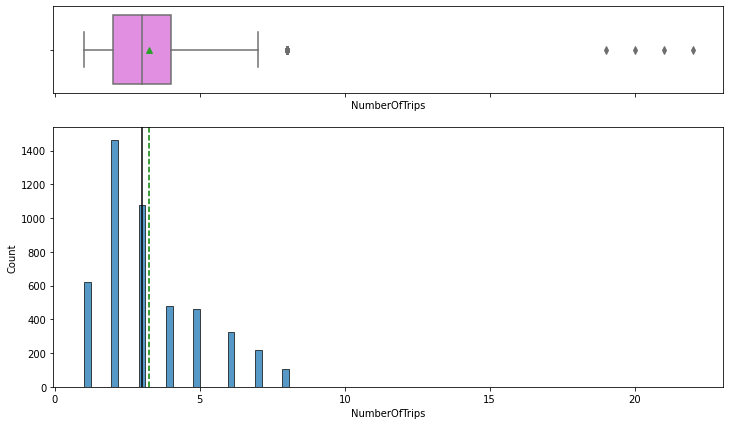

In [162]:
histogram_boxplot(df, 'NumberOfTrips')

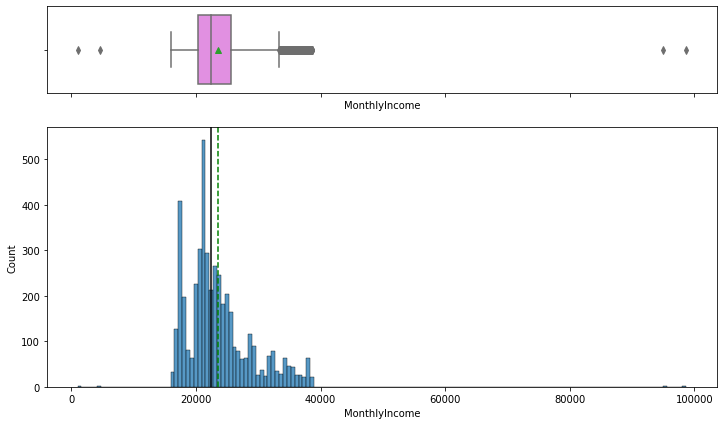

In [163]:
histogram_boxplot(df, 'MonthlyIncome')

Each of these features has a low number of outliers. While some data might be interesting these will skew this model. Dropping all outliers in the data set.

In [164]:
#droping outliers
df.drop(index=df[df.DurationOfPitch>37].index,inplace=True)
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)
df.drop(index=df[df.NumberOfChildrenVisiting>8].index,inplace=True)

In [168]:
df.sample()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
976,0,56.0,Self Enquiry,1,29.0,Salaried,Male,3,3.0,Super Deluxe,4.0,Divorced,5.0,1,4,1,2.0,AVP,28402.0


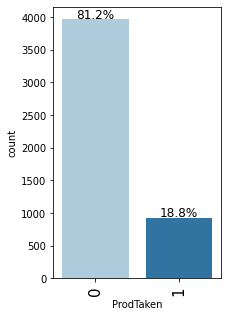

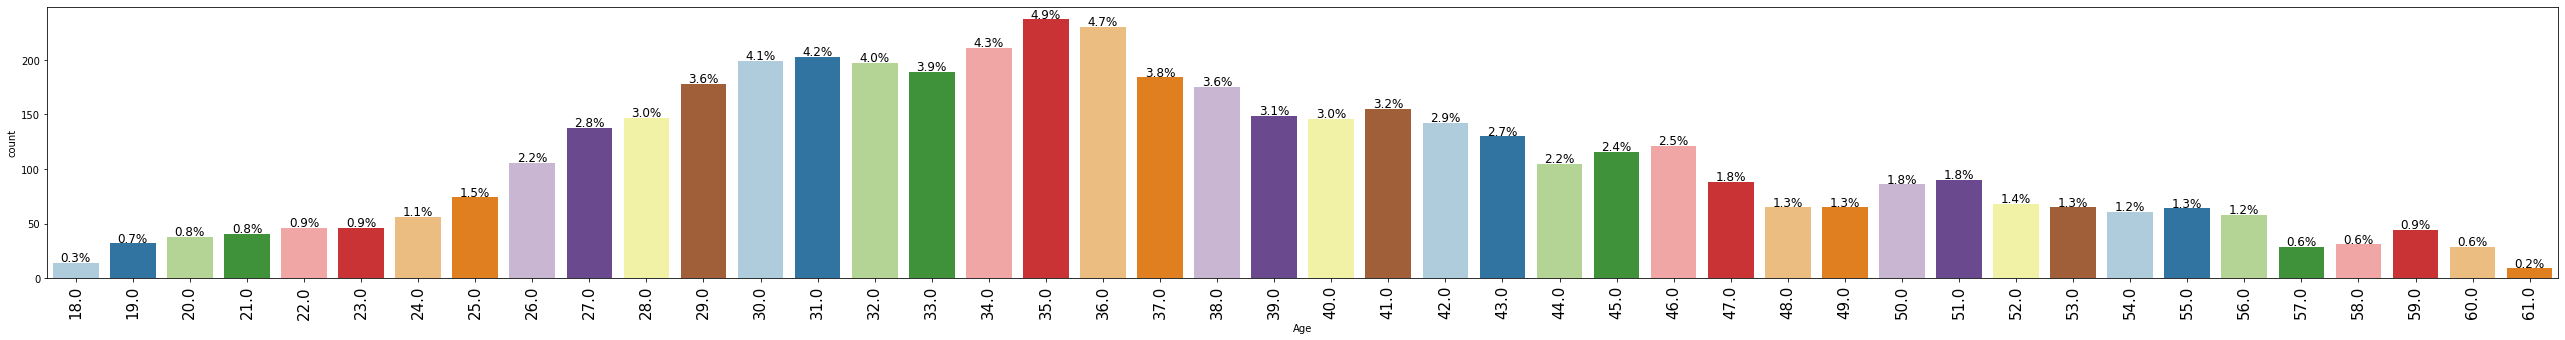

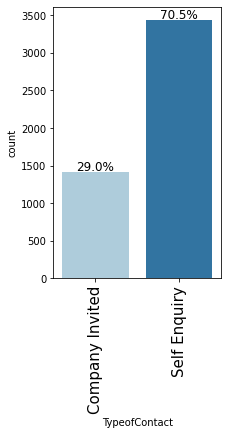

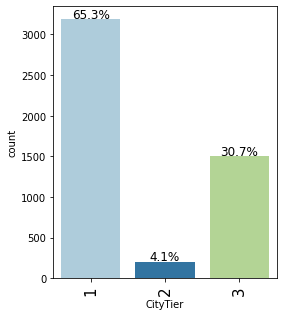

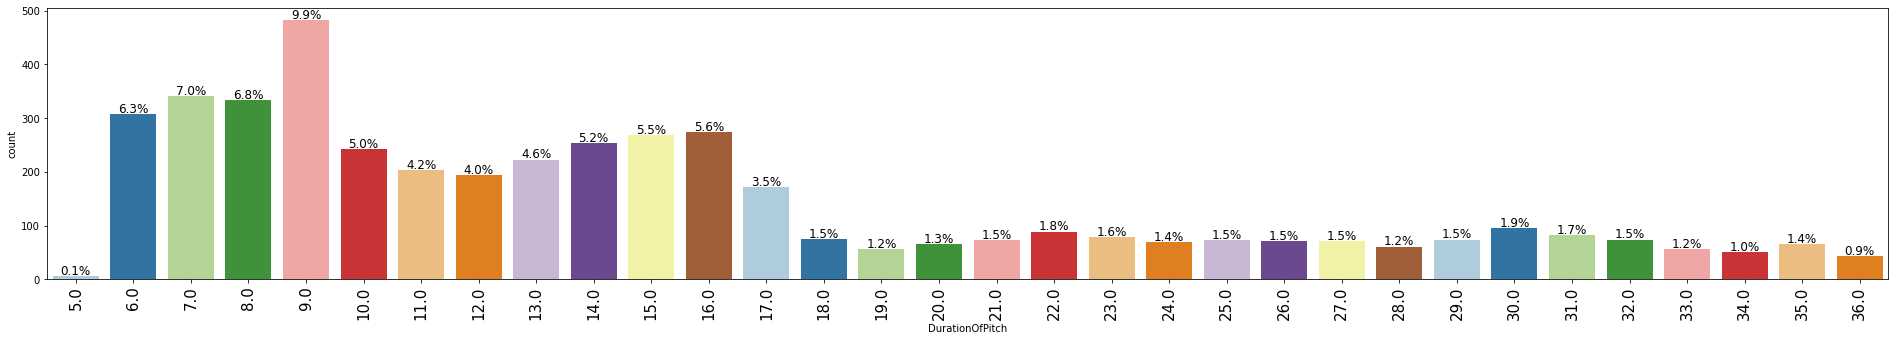

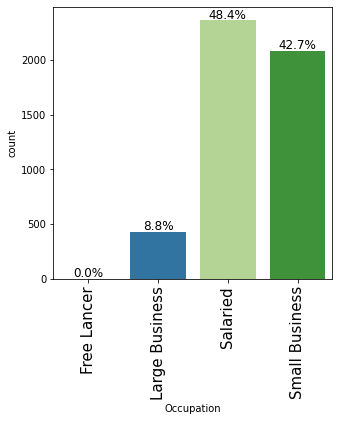

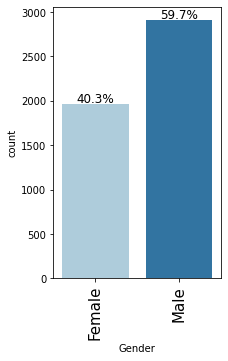

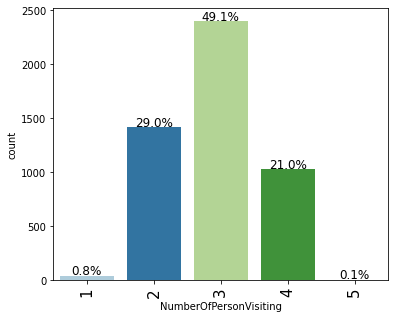

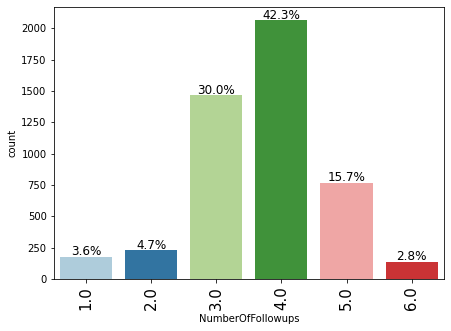

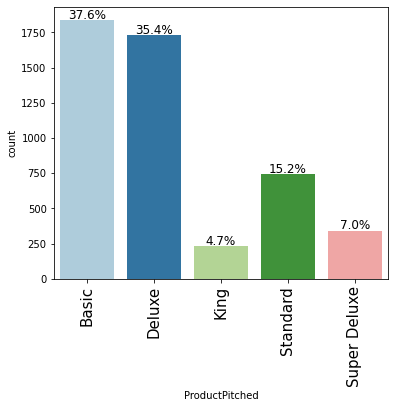

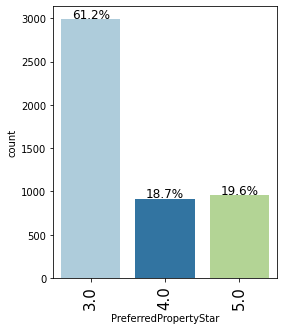

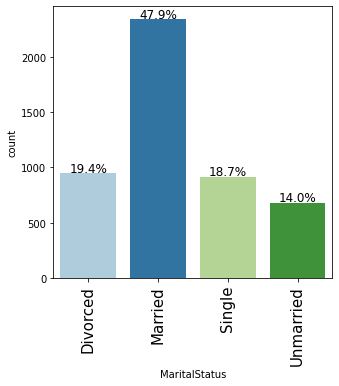

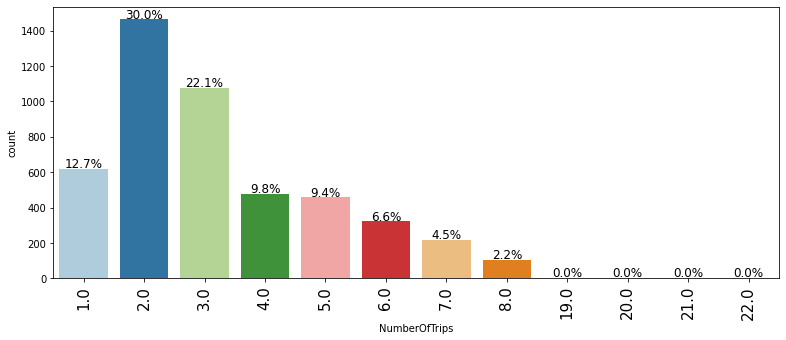

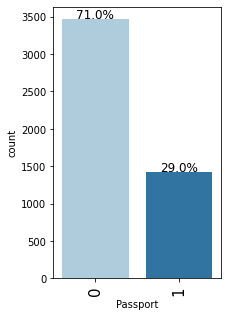

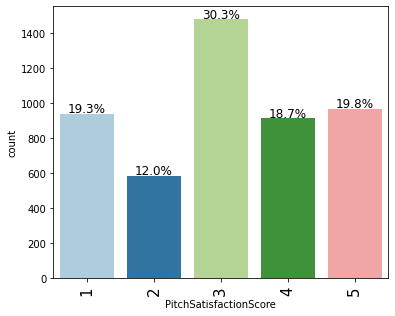

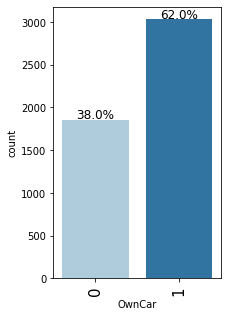

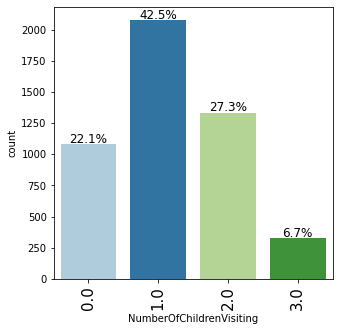

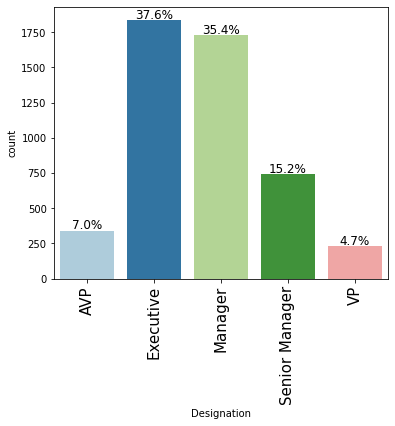

In [179]:
# function to print barplots for all features

plots = df.copy()
plots.drop(columns='MonthlyIncome', axis = 1, inplace=True)

for i in plots:
    labeled_barplot(plots, i, perc=True)

### Bivariate Analysis

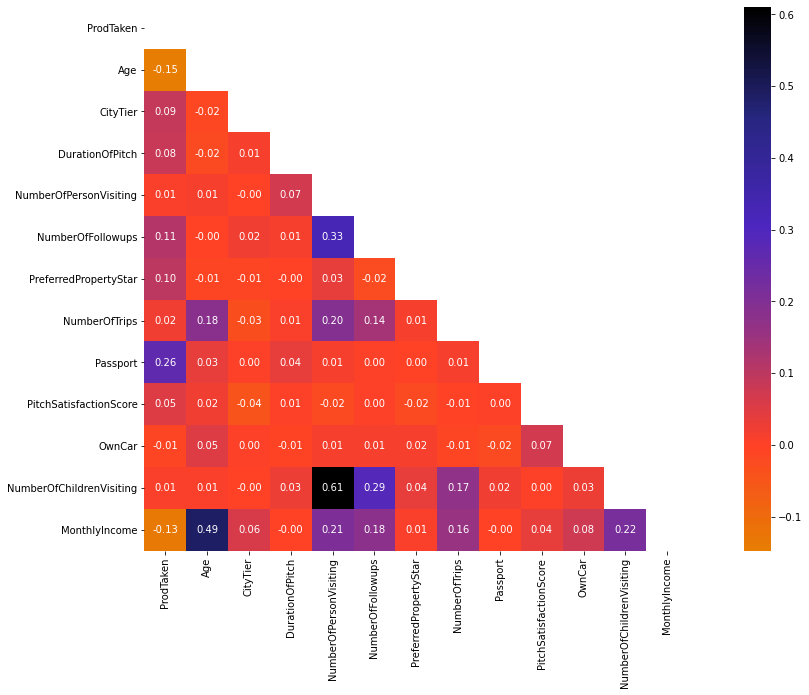

In [181]:
# Generating the lower half a heatmap only
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='CMRmap_r')
plt.show()

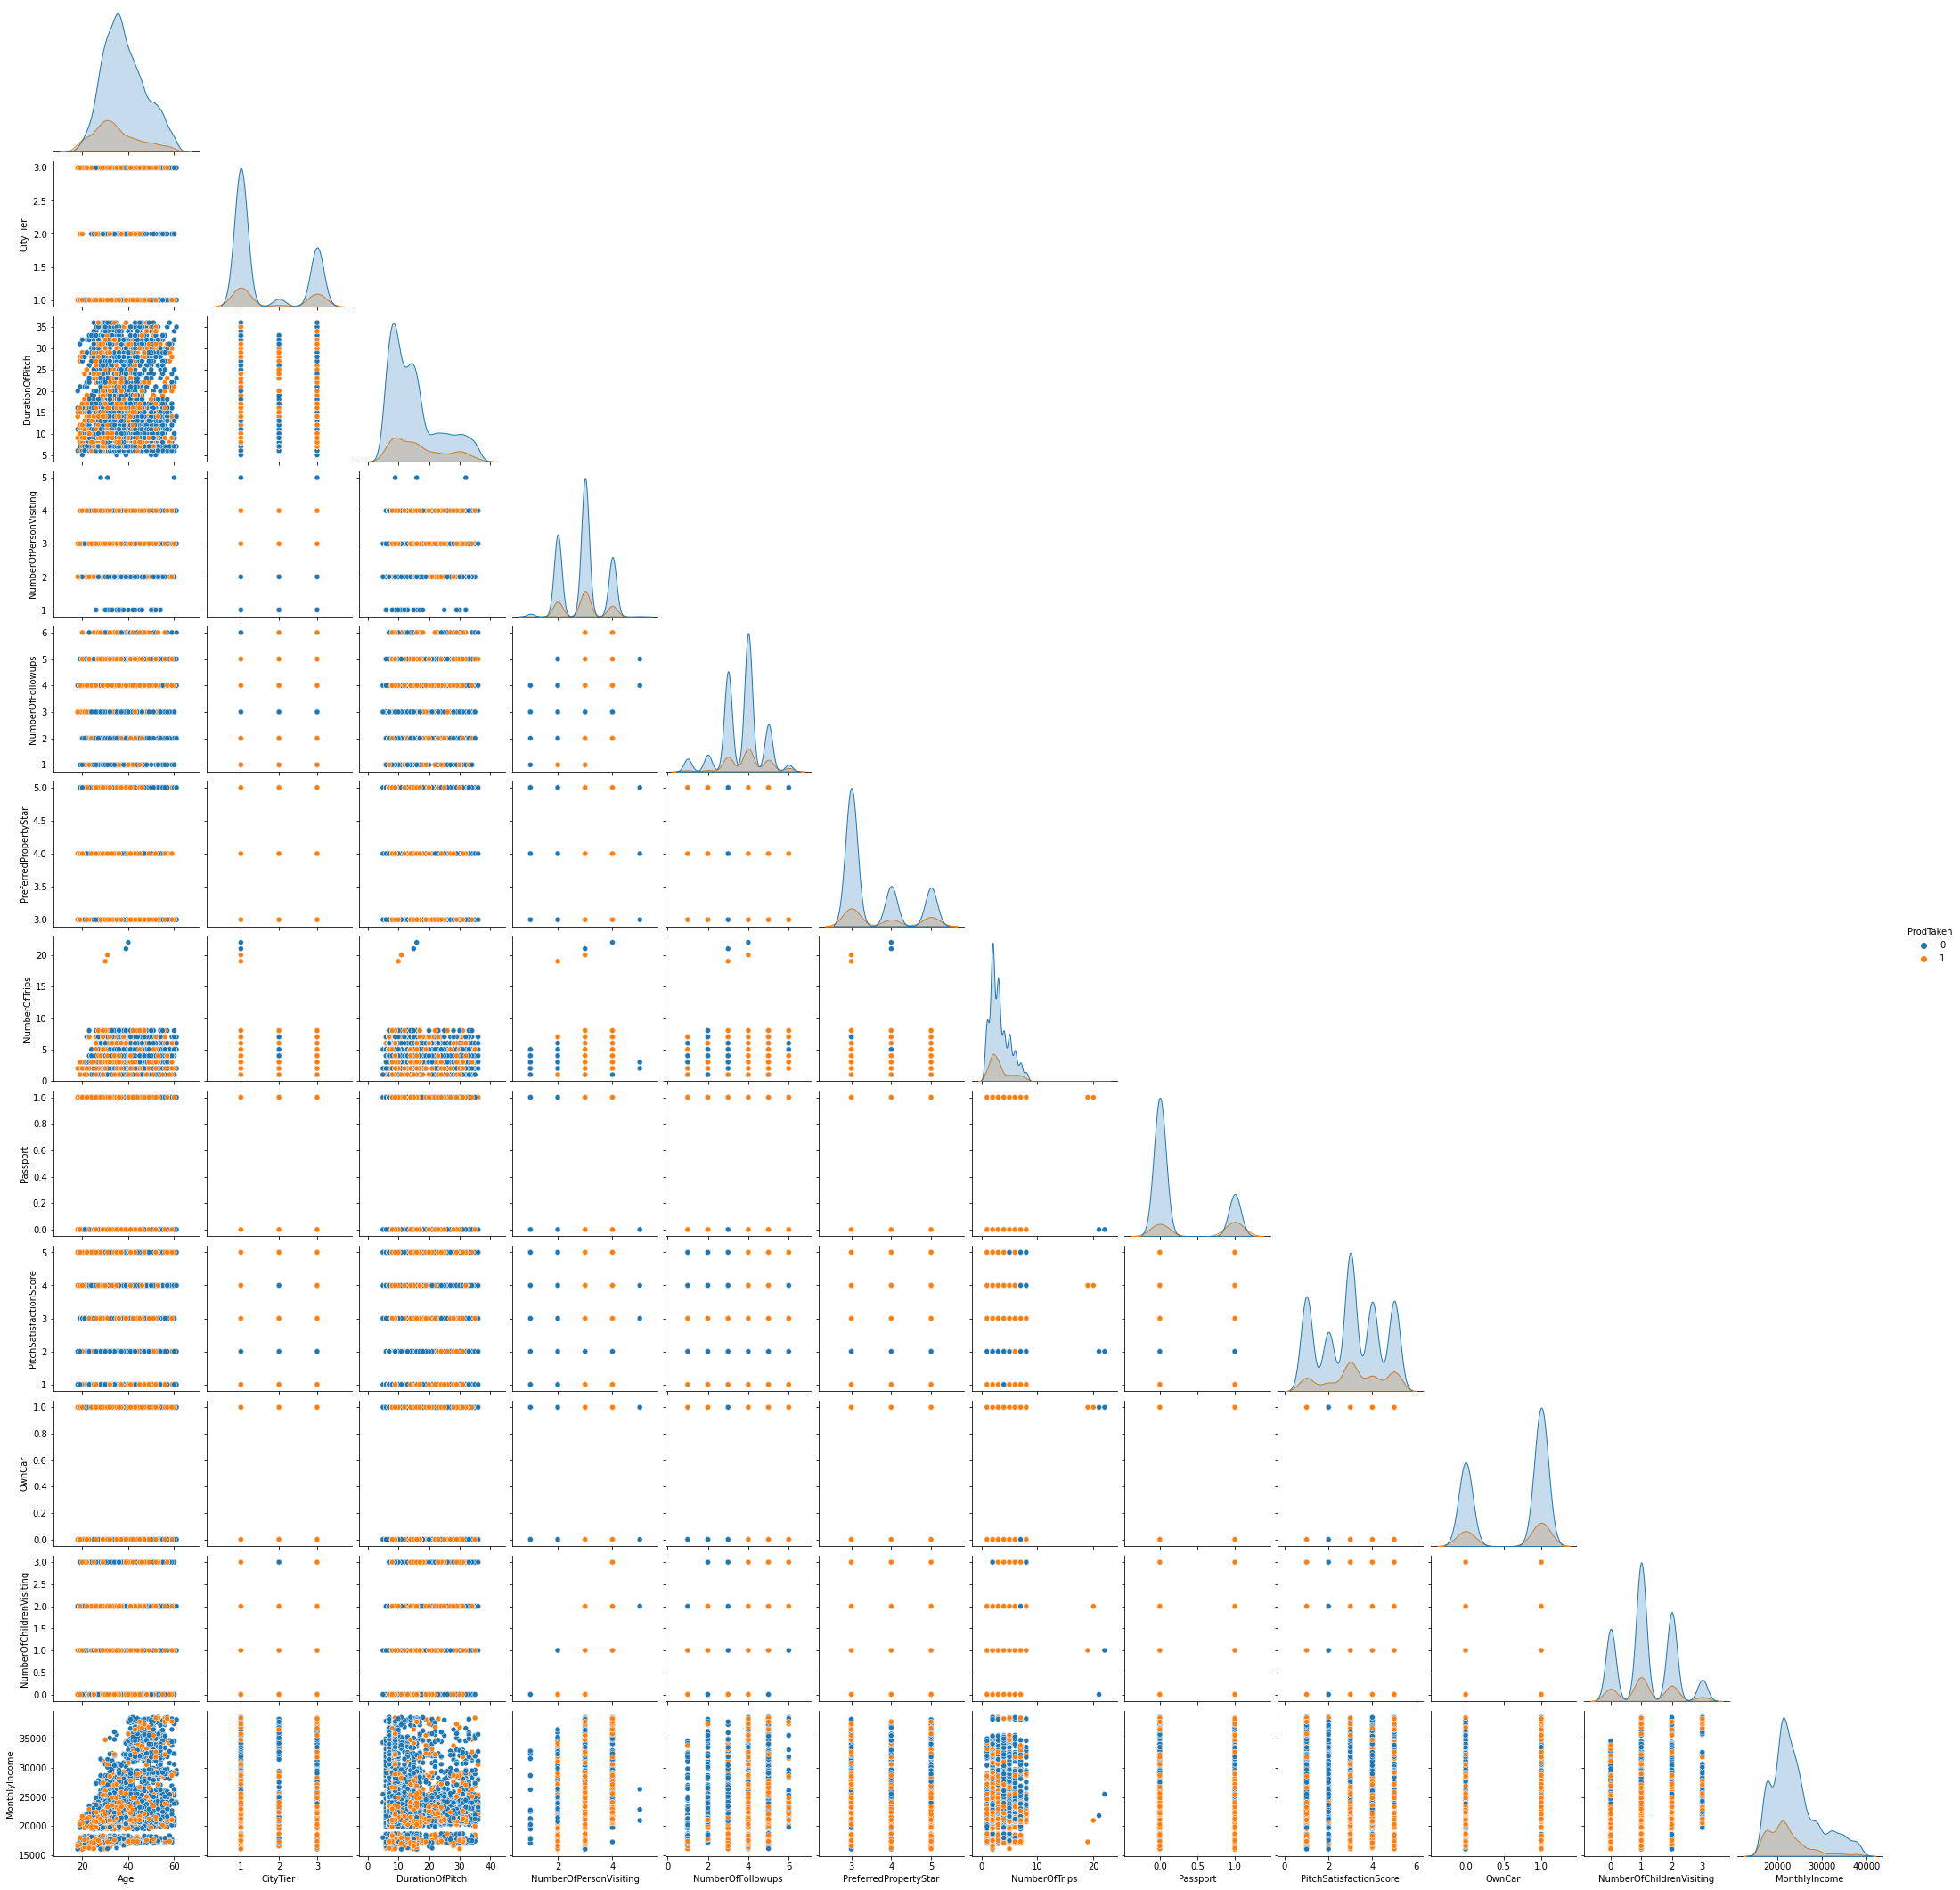

In [182]:
# Generating the lower half a heatmap only
sns.pairplot(df, corner=True, hue='ProdTaken')
plt.show()

ProdTaken     0    1   All
ProdTaken                 
1             0  920   920
All        3962  920  4882
0          3962    0  3962
------------------------------------------------------------------------------------------------------------------------


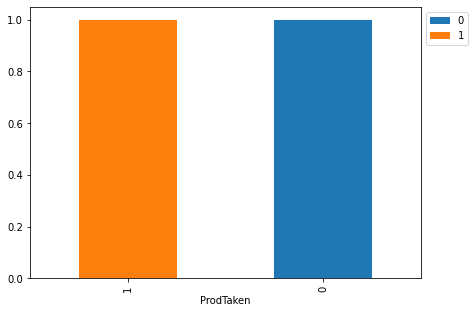

ProdTaken     0    1   All
Age                       
All        3781  876  4657
29.0        121   57   178
30.0        151   48   199
34.0        167   44   211
31.0        162   41   203
33.0        149   40   189
32.0        157   40   197
26.0         69   37   106
35.0        203   34   237
27.0        108   30   138
36.0        203   27   230
28.0        121   26   147
20.0         13   25    38
41.0        131   24   155
37.0        160   24   184
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
25.0         54   20    74
42.0        122   20   142
24.0         38   18    56
45.0         98   18   116
44.0         88   17   105
51.0         73   17    90
38.0        160   15   175
22.0         31   15    46
39.0        135   14   149
52.0         54   14    68
23.0         33   13    46
47.0         76   12    88
56.0         46   12    58
50.0         74   12    86
59.0         32   12    44
58.0         20   11    31
48.0         54   11    65
4

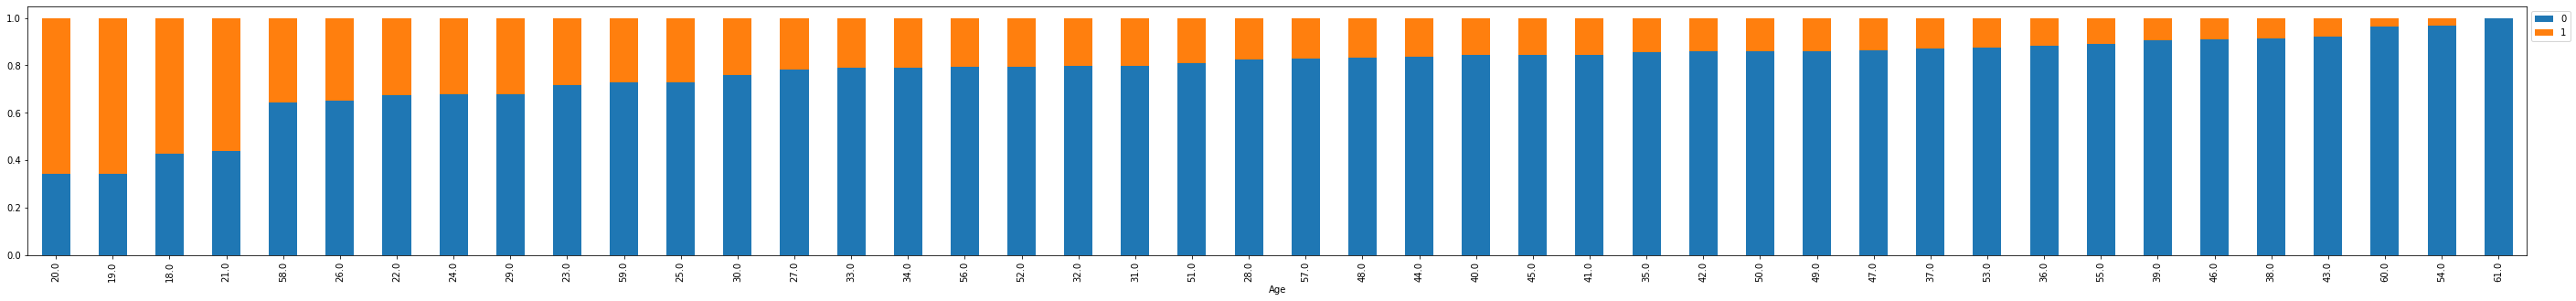

ProdTaken           0    1   All
TypeofContact                   
All              3940  917  4857
Self Enquiry     2833  607  3440
Company Invited  1107  310  1417
------------------------------------------------------------------------------------------------------------------------


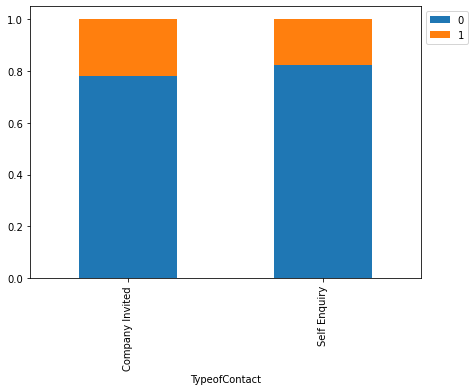

ProdTaken     0    1   All
CityTier                  
All        3962  920  4882
1          2666  520  3186
3          1144  354  1498
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


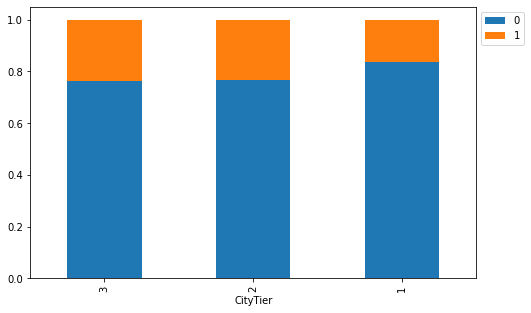

ProdTaken           0    1   All
DurationOfPitch                 
All              3756  875  4631
9.0               403   79   482
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              198   45   243
14.0              212   41   253
6.0               268   39   307
11.0              167   37   204
12.0              161   33   194
13.0              191   32   223
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
23.0               58   21    79
29.0               53   21    74
19.0               36   21    57
20.0               46   19    65
18.0               56   19    75
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

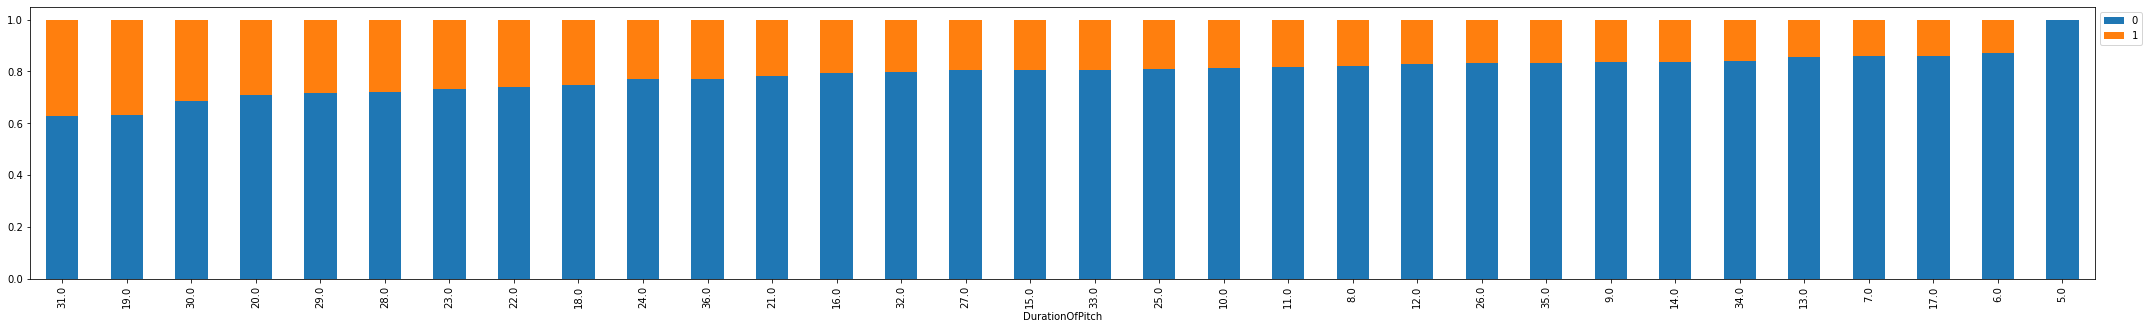

ProdTaken          0    1   All
Occupation                     
All             3962  920  4882
Salaried        1950  414  2364
Small Business  1700  384  2084
Large Business   312  120   432
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


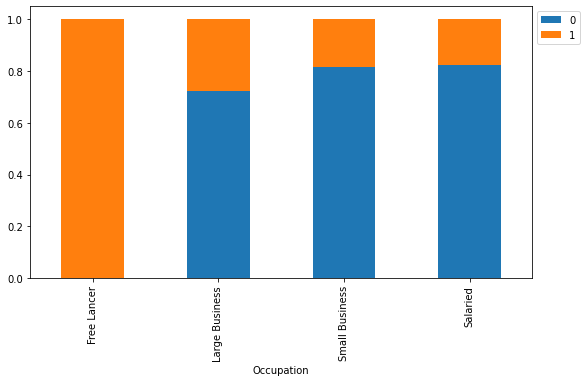

ProdTaken     0    1   All
Gender                    
All        3962  920  4882
Male       2336  578  2914
Female     1626  342  1968
------------------------------------------------------------------------------------------------------------------------


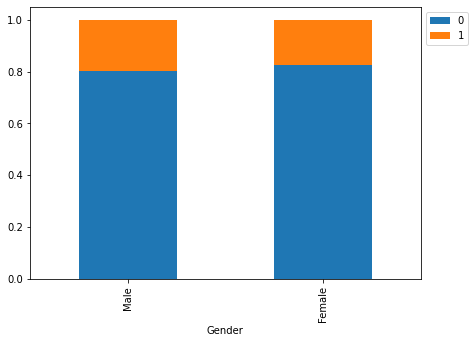

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3962  920  4882
3                       1939  460  2399
2                       1148  267  1415
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


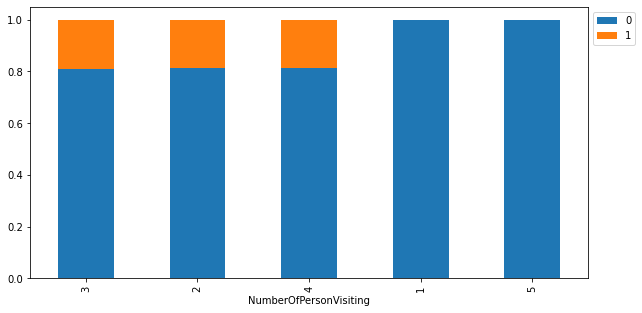

ProdTaken             0    1   All
NumberOfFollowups                 
All                3925  912  4837
4.0                1686  379  2065
3.0                1220  244  1464
5.0                 576  191   767
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


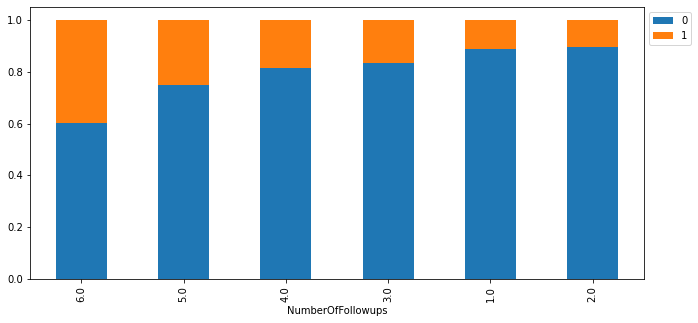

ProdTaken          0    1   All
ProductPitched                 
All             3962  920  4882
Basic           1286  552  1838
Deluxe          1526  204  1730
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


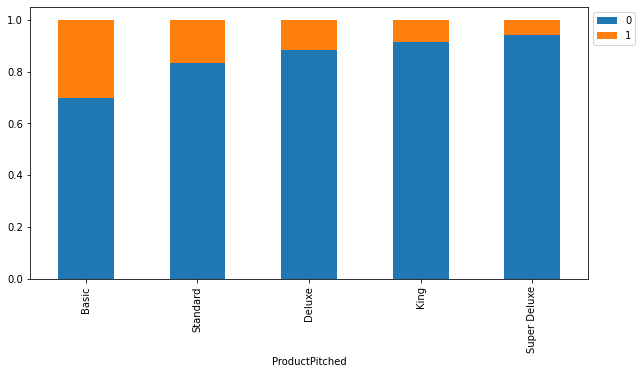

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3943  914  4857
3.0                    2507  482  2989
5.0                     705  250   955
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


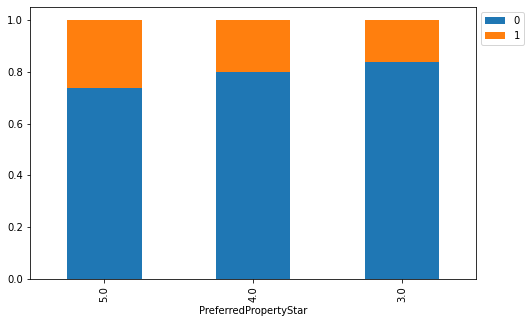

ProdTaken         0    1   All
MaritalStatus                 
All            3962  920  4882
Married        2012  326  2338
Single          610  304   914
Unmarried       516  166   682
Divorced        824  124   948
------------------------------------------------------------------------------------------------------------------------


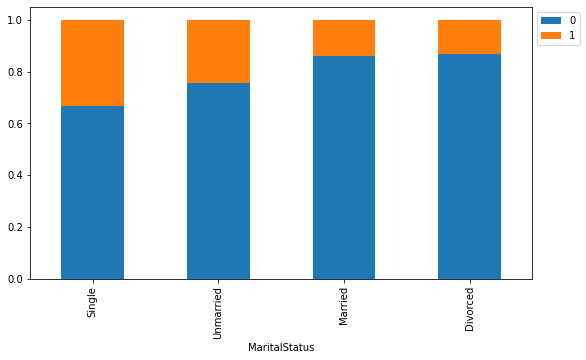

ProdTaken         0    1   All
NumberOfTrips                 
All            3834  908  4742
2.0            1164  299  1463
3.0             861  217  1078
1.0             507  112   619
6.0             258   64   322
5.0             395   62   457
7.0             156   62   218
4.0             415   61   476
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


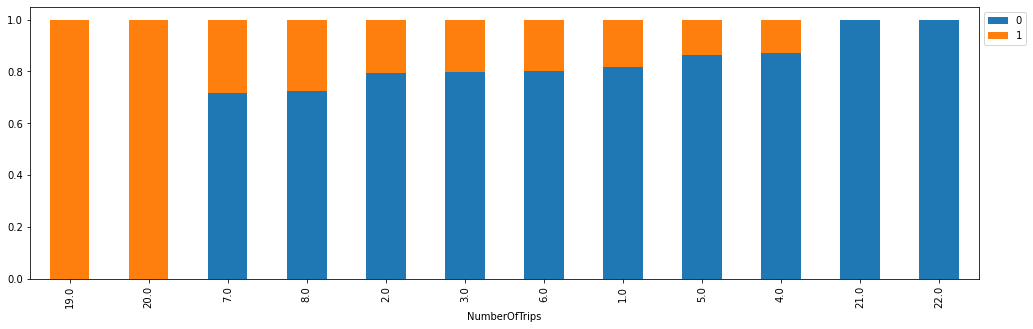

ProdTaken     0    1   All
Passport                  
All        3962  920  4882
1           924  494  1418
0          3038  426  3464
------------------------------------------------------------------------------------------------------------------------


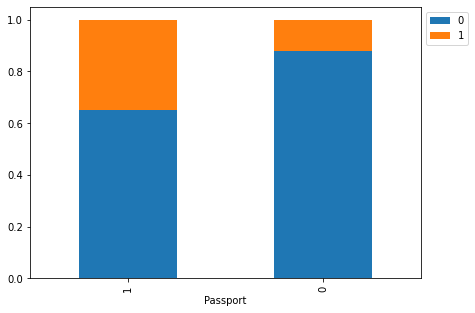

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3962  920  4882
3                       1162  316  1478
5                        758  210   968
4                        750  162   912
1                        796  144   940
2                        496   88   584
------------------------------------------------------------------------------------------------------------------------


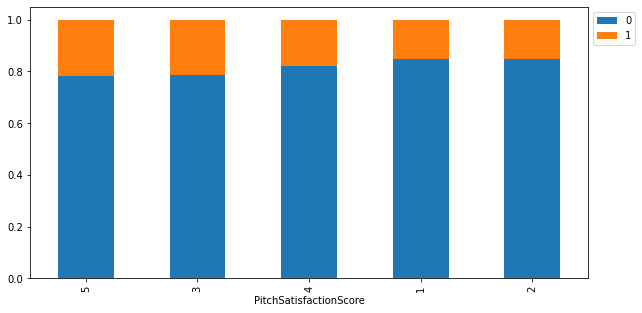

ProdTaken     0    1   All
OwnCar                    
All        3962  920  4882
1          2468  560  3028
0          1494  360  1854
------------------------------------------------------------------------------------------------------------------------


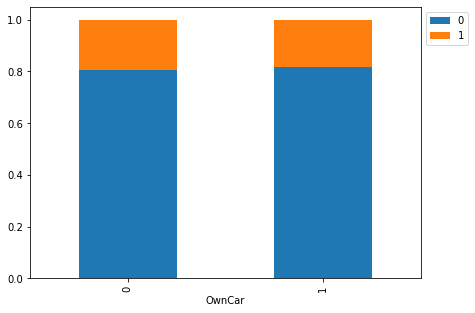

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3903  913  4816
1.0                       1685  392  2077
2.0                       1081  253  1334
0.0                        878  202  1080
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


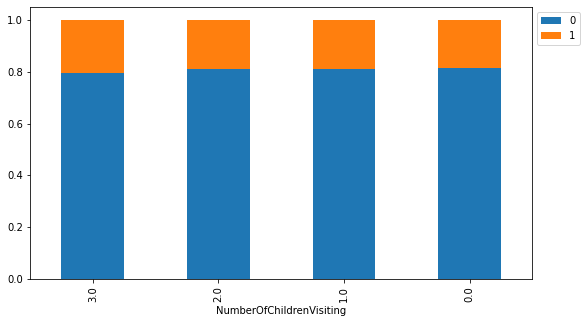

ProdTaken          0    1   All
Designation                    
All             3962  920  4882
Executive       1286  552  1838
Manager         1526  204  1730
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


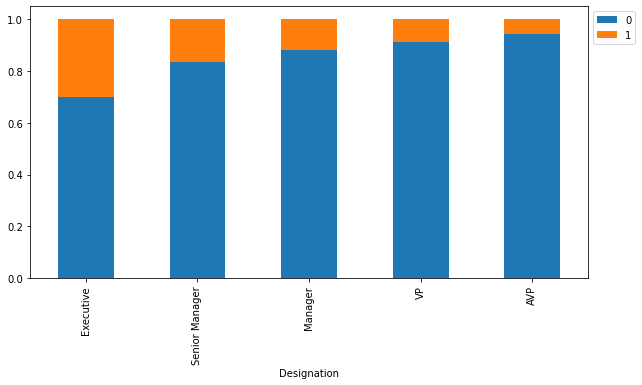

In [183]:
Print 
for i in plots:
    stacked_barplot(plots, i, "ProdTaken" )

### Customer Profiles

In [184]:
df[(df['ProductPitched']=='Basic') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,NaN,NaN,NaN,1.51087,0.832566,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,NaN,NaN,NaN,2.905797,0.701439,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,548.0,NaN,NaN,NaN,3.95073,0.967166,1.0,3.0,4.0,5.0,6.0
ProductPitched,552,1,Basic,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# Lets create specific data frames for each profile

profiles = df.copy()
profiles.drop(profiles[profiles.ProdTaken == 0].index, inplace = True)     

basic = profiles.copy()   # new data frame to create a profile for customers of the basic product
standard = profiles.copy()   # new data frame to create a profile for customers of the standard product
deluxe = profiles.copy()   # new data frame to create a profile for customers of the deluxe product
superDeluxe = profiles.copy()   # new data frame to create a profile for customers of the superDeluxe product
king = profiles.copy()   # new data frame to create a profile for customers of the king product

basic.drop(basic[basic.ProductPitched != 'Basic'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
standard.drop(standard[standard.ProductPitched != 'Standard'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
deluxe.drop(deluxe[deluxe.ProductPitched != 'Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
superDeluxe.drop(superDeluxe[superDeluxe.ProductPitched != 'Super Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
king.drop(king[king.ProductPitched != 'King'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition

In [205]:
basic.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,552.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,515.0,31.289320,9.070829,18.0,25.0,30.0,35.0,59.0
CityTier,552.0,1.510870,0.832566,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,532.0,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
NumberOfPersonVisiting,552.0,2.905797,0.701439,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,548.0,3.950730,0.967166,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,552.0,3.771739,0.861812,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,547.0,3.226691,2.081618,1.0,2.0,3.0,4.0,20.0
Passport,552.0,0.583333,0.493454,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,552.0,3.213768,1.353074,1.0,2.0,3.0,4.0,5.0


# Clean up all profiles 
##### Basic Package Customer Profile  Analysis

1) Basic is our most populare product and makes up over half of our sales <br>
2) The largest range of customers is between 25 - 35 <br>
3) Most customers will visit tier 1 & 2 citites <br>
4) Most customers will need a pitch of less than 22 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 16,000 & 21400 <br>
7) Executives are the only customers picking this package <br>
8) Around 70% of customers were self initiated <br>
--------------------------------------------------

In [206]:
standard.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,124.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,123.0,41.008130,9.876695,19.0,33.00,38.0,49.00,60.0
CityTier,124.0,2.096774,0.966255,1.0,1.00,3.0,3.00,3.0
DurationOfPitch,123.0,19.065041,9.048811,6.0,11.00,17.0,29.00,36.0
NumberOfPersonVisiting,124.0,2.967742,0.709236,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,124.0,3.935484,0.908335,1.0,3.00,4.0,4.25,6.0
PreferredPropertyStar,123.0,3.731707,0.878460,3.0,3.00,3.0,5.00,5.0
NumberOfTrips,123.0,3.016260,1.815163,1.0,2.00,2.0,4.00,8.0
Passport,124.0,0.387097,0.489062,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,124.0,3.467742,1.309350,1.0,3.00,3.0,5.00,5.0


##### Standard Package Customer Profile Analysis
1) Standard is our 3rd product in popularity <br>
2) The largest range of customers is between 33 - 49 <br>
3) Customers visit all tiers of cities <br>
4) Most customers will need a pitch of less than 29 minutes <br>
5) On average it will take 4 follow ups to close the date <br>
6) Most customers have a monthly income between 23,900 to 29000 <br>
7) Senior Managers are the only customers picking this package <br>
8) Roughly 75% of customers were self inquiries <br>
--------------------------------------------------

In [207]:
deluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,204.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,198.0,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
CityTier,204.0,2.411765,0.913532,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,180.0,19.100000,9.227176,6.0,11.0,16.0,28.0,36.0
NumberOfPersonVisiting,204.0,2.950980,0.707141,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,200.0,3.970000,1.051011,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,203.0,3.699507,0.857899,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,202.0,3.702970,2.022483,1.0,2.0,3.0,5.0,8.0
Passport,204.0,0.490196,0.501134,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,204.0,3.039216,1.278250,1.0,2.0,3.0,4.0,5.0


##### Deluxe Package Customer Profile Analysis

1) Deluxe is our 2nd most populare product making up over 20% of our sales <br>
2) The largest range of customers is between 32 - 44 <br>
3) Most customers will visit all tires of cities <br>
4) Most customers will need a pitch of less than 28 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 20,500 & 24,500 <br>
7) Managers are the only customers picking this package <br>
8) Roughly 70% of customers were self inquiries <br>
--------------------------------------------------

In [208]:
superDeluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Age,20.0,43.500000,4.839530,39.0,40.0,42.0,45.25,56.0
CityTier,20.0,2.600000,0.820783,1.0,3.0,3.0,3.00,3.0
DurationOfPitch,20.0,18.500000,7.330542,8.0,15.0,18.5,20.00,31.0
NumberOfPersonVisiting,20.0,2.700000,0.656947,2.0,2.0,3.0,3.00,4.0
NumberOfFollowups,20.0,3.100000,1.618967,1.0,2.0,3.0,4.00,6.0
PreferredPropertyStar,20.0,3.600000,0.820783,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,19.0,3.263158,2.490919,1.0,1.0,2.0,5.50,8.0
Passport,20.0,0.600000,0.502625,0.0,0.0,1.0,1.00,1.0
PitchSatisfactionScore,20.0,3.800000,1.005249,3.0,3.0,3.0,5.00,5.0


##### Super Deluxe Package Customer Profile Analysis

1) Very few customers pick the Super Deluxe Package <br>
2) The largest range of customers is between 40 - 45 <br>
3) Most customers will only almost exclusively visit tier 3 cities <br>
4) Most customers will need a pitch of less than 20 minutes <br>
5) On average it will take 3 follow ups to close the deal <br>
6) Most customers have a monthly income between 28,000 - 32,000 <br>
7) AVPs are the only customers picking this package <br>
8) 80% of customers were company invited <br>

--------------------------------------------------

In [209]:
king.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,20.0,48.900000,9.618513,27.0,42.00,52.5,56.0,59.0
CityTier,20.0,1.800000,1.005249,1.0,1.00,1.0,3.0,3.0
DurationOfPitch,20.0,10.500000,4.135851,8.0,8.00,9.0,9.0,19.0
NumberOfPersonVisiting,20.0,2.900000,0.718185,2.0,2.00,3.0,3.0,4.0
NumberOfFollowups,20.0,4.300000,1.128576,3.0,3.00,4.0,5.0,6.0
PreferredPropertyStar,16.0,3.750000,0.683130,3.0,3.00,4.0,4.0,5.0
NumberOfTrips,17.0,3.411765,1.938389,1.0,2.00,3.0,4.0,7.0
Passport,20.0,0.600000,0.502625,0.0,0.00,1.0,1.0,1.0
PitchSatisfactionScore,20.0,3.300000,1.218282,1.0,3.00,3.0,4.0,5.0


##### King Package Customer Profile Analysis
1) Very few customers pick the King package <br>
2) The largest range of customers is between 42 - 46 <br>
3) 50% of customers will visit tier 1 cities <br>
4) Most customers will need a pitch of less than 9 minutes making them group with lowest pitch <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 34,400 - 38,000 <br>
7) VPs are the only customers picking this package <br>
8) All customers were self inquires  <br>

--------------------------------------------------